In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [79]:
from sklearn.datasets import load_diabetes
diabetesData = load_diabetes()

In [80]:
diabetesData.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [81]:
print(list(diabetesData))

['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']


In [82]:
type(diabetesData['data'])

numpy.ndarray

In [83]:
print(diabetesData.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [31]:
print(diabetesData.feature_names)
# print(diabetesData['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [84]:
diabetes = pd.DataFrame(diabetesData.data, columns=diabetesData.feature_names)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [23]:
diabetes.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [27]:
diabetesData.target[:20]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.])

In [85]:
diabetes['y'] = diabetesData.target

In [29]:
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


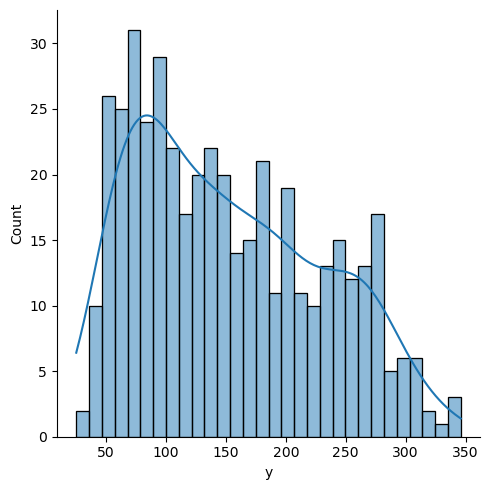

In [37]:
# distribution of quantitative measure of disease progression one year after baseline
sns.displot(diabetes.y,kde=True, bins=30)

<AxesSubplot:>

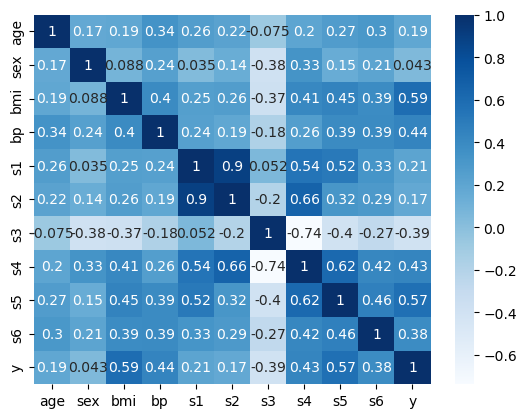

In [45]:
#sns.heatmap(diabetes.corr(), annot=True, cmap='YlGnBu')
sns.heatmap(diabetes.corr(), annot=True, cmap='Blues')

Text(0.5, 1.0, 'bmi correlation')

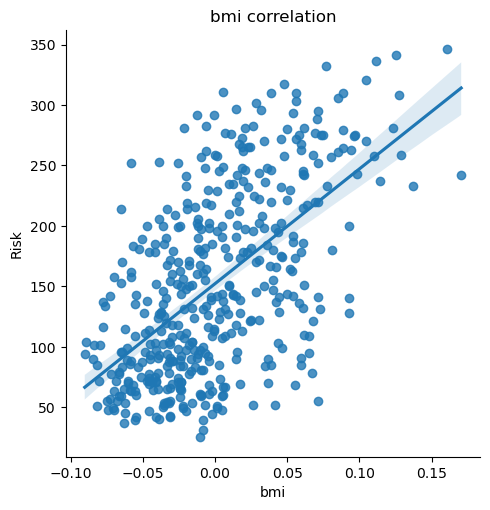

In [93]:
sns.lmplot(x='bmi',y='y',data=diabetes)
plt.ylabel('Risk')
plt.xlabel('bmi')
plt.title('bmi correlation')

In [47]:
diabetes.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'y'], dtype='object')

In [86]:
# define predictive features & target 
X = diabetes[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
y = diabetes['y']

# split training set - test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [87]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.coef_

array([ -88.74489714, -237.88374195,  464.95706319,  375.28919134,
       -764.59555933,  550.0967145 ,   35.61287044,  156.24187996,
        750.01225601,   39.70617978])

In [88]:
cdf = pd.DataFrame(lm.coef_ , X.columns, columns= ['coeff'])
cdf

,coeff
age,-88.744897
sex,-237.883742
bmi,464.957063
bp,375.289191
s1,-764.595559
s2,550.096715
s3,35.612870
s4,156.241880
s5,750.012256
s6,39.706180


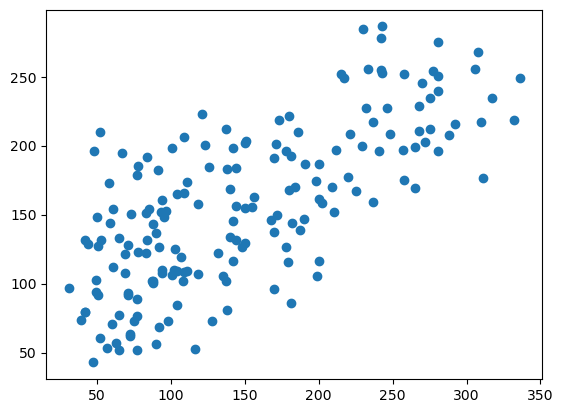

In [90]:
prediction = lm.predict(X_test)
plt.scatter(y_test,prediction)

Text(0.5, 1.0, 'RESIDUALS')

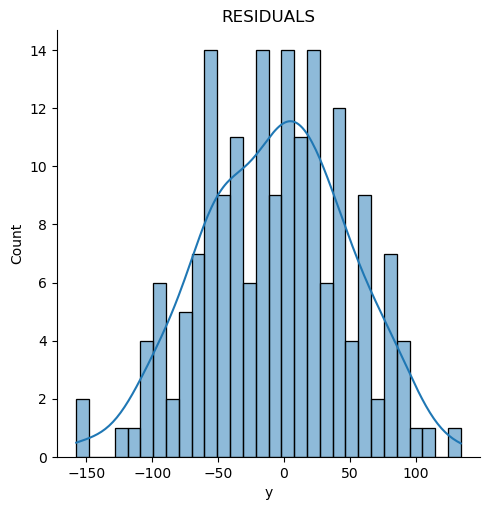

In [76]:
sns.displot((y_test - prediction), kde=True, bins=30)
plt.title('RESIDUALS')

In [74]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,prediction))

55.252631235246675